VLF Paper Plots
=============

This notebook is the final notebook to make the plots for the VLF statistical paper.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import dates, colors
from matplotlib.ticker import ScalarFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats
import datetime
from astropy.visualization import hist
import seaborn as sns
from matplotlib import gridspec
from astropy import units as u
from astropy.coordinates import SkyCoord
import sunpy.map
from sunpy.coordinates import frames
from matplotlib.ticker import MultipleLocator

Set up plotting defaults

In [2]:
sns.set_context("paper", font_scale=1.5)
plt.rcParams['xtick.direction'] = "in"
plt.rcParams['ytick.direction'] = "in"
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True


plt.rcParams['font.family'] = 'Helvetica'
cmap_paper = plt.cm.viridis

Read in the final results from the statistical data. This data is created in the `final_vlf_stats_df.py` file.

In [3]:
vlf_stats = pd.read_csv("vlf_stats_results_new.csv")

In [4]:
vlf_stats.drop(np.where(vlf_stats["start_time_goes"].isin(["2017-04-02 07:50:00"]))[0], inplace=True)

In [5]:
vlf_stats.keys()

Index(['start_time_goes', 'peak_flare_gl', 'peak_flare_gs', 'peak_flare_gl-bg',
       'peak_flare_gs-bg', 'max_vlf_volts', 'abs_vlf_volts',
       'background_sid_db', 'background_sid_volts', 'background_gl',
       'background_gs', 'max_vlf_db', 'abs_vlf_db', 'dt_value_gl',
       'dt_value_gs', 'index', 'event_starttime', 'event_peaktime',
       'event_endtime', 'goes_class_ind', 'goes_class', 'goes_class_val',
       'integrated_flux', 'noaa_ar', 'position_hgs', 'hgs_lat', 'hgs_lon',
       'hpc_x', 'hpc_y', 'event_end', 'peak_hour', 'unique_day',
       'background_times'],
      dtype='object')

In [6]:
vlf_stats["goes_class_ind"].value_counts()

C    261
M     71
X      2
Name: goes_class_ind, dtype: int64

In [7]:
len(vlf_stats)

334

## Make plots!

SpearmanrResult(correlation=0.8013801200648443, pvalue=4.35256600321644e-76)


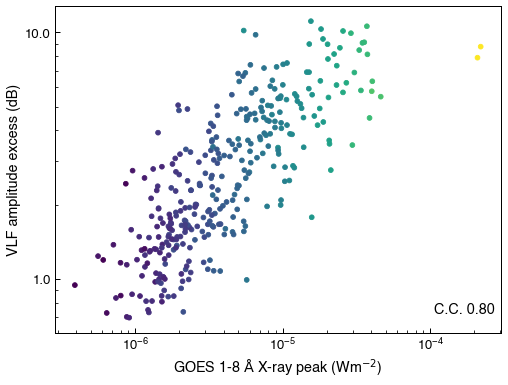

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
im = ax.scatter(vlf_stats["peak_flare_gl-bg"], vlf_stats["abs_vlf_db"], 
                c=vlf_stats["peak_flare_gl"], norm=colors.LogNorm(), 
                cmap=cmap_paper)
ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel("GOES 1-8 $\mathrm{\AA}$ X-ray peak (Wm$^{-2}$)")
ax.set_ylabel("VLF amplitude excess (dB)")

ax.yaxis.set_major_formatter(ScalarFormatter())

cc = scipy.stats.spearmanr(vlf_stats["peak_flare_gl-bg"], vlf_stats["abs_vlf_db"])
print(cc)
ax.text(0.85, 0.06, "C.C. {:.2f}".format(round(cc.correlation, 2)), transform=ax.transAxes)

plt.savefig("./final_paper_plots/peak_flux_gl_nocbar.png", facecolor="w", dpi=500, bbox_inches="tight")

Testing out truncating the colormap as the yellow color is hard to see.

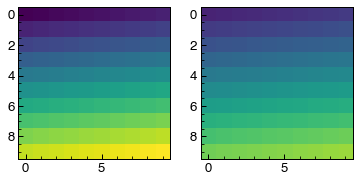

In [9]:
from matplotlib import colors
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


arr = np.linspace(0, 50, 100).reshape((10, 10))
fig, ax = plt.subplots(ncols=2)

cmap = plt.cm.viridis
new_cmap = truncate_colormap(cmap, 0.1, 0.85)

ax[0].imshow(arr, interpolation='nearest', cmap=cmap)
ax[1].imshow(arr, interpolation='nearest', cmap=new_cmap)
plt.show()

# 4.1 Amp response

In [10]:
print("Spearman corr")
print("1-8 angs and VLF amp (dB) - backsub:", scipy.stats.spearmanr(vlf_stats["peak_flare_gl-bg"], vlf_stats["abs_vlf_db"]).correlation)
print("1-8 angs and VLF amp (dB):", scipy.stats.spearmanr(vlf_stats["peak_flare_gl"], vlf_stats["abs_vlf_db"]).correlation)
print("0.5-4 angs and VLF amp (dB) - backsub:", scipy.stats.spearmanr(vlf_stats["peak_flare_gs-bg"], vlf_stats["abs_vlf_db"]).correlation)
print("0.5-4 angs and VLF amp (dB):", scipy.stats.spearmanr(vlf_stats["peak_flare_gs"], vlf_stats["abs_vlf_db"]).correlation)

Spearman corr
1-8 angs and VLF amp (dB) - backsub: 0.8013801200648443
1-8 angs and VLF amp (dB): 0.7863034844770305
0.5-4 angs and VLF amp (dB) - backsub: 0.7931852615508052
0.5-4 angs and VLF amp (dB): 0.7940109266319929


In [11]:
print("Pearsonr corr")
print("1-8 angs and VLF amp (dB) - backsub:", scipy.stats.pearsonr(np.log10(vlf_stats["peak_flare_gl-bg"]), np.log10(vlf_stats["abs_vlf_db"]))[0])
print("1-8 angs and VLF amp (dB):", scipy.stats.pearsonr(np.log10(vlf_stats["peak_flare_gl"]), np.log10(vlf_stats["abs_vlf_db"]))[0])
print("0.5-4 angs and VLF amp (dB) - backsub:", scipy.stats.pearsonr(np.log10(vlf_stats["peak_flare_gs-bg"]), np.log10(vlf_stats["abs_vlf_db"]))[0])
print("0.5-4 angs and VLF amp (dB):", scipy.stats.pearsonr(np.log10(vlf_stats["peak_flare_gs"]), np.log10(vlf_stats["abs_vlf_db"]))[0])

Pearsonr corr
1-8 angs and VLF amp (dB) - backsub: 0.7889292992256655
1-8 angs and VLF amp (dB): 0.7701156542527872
0.5-4 angs and VLF amp (dB) - backsub: 0.7768919992616432
0.5-4 angs and VLF amp (dB): 0.7783193201289211


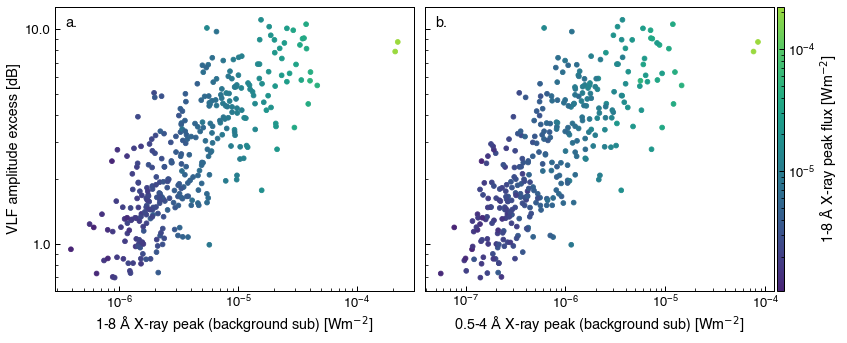

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
im = ax1.scatter(vlf_stats["peak_flare_gl-bg"], vlf_stats["abs_vlf_db"], 
                c=vlf_stats["peak_flare_gl"], norm=colors.LogNorm(), 
                cmap=new_cmap, zorder=3)


im2 = ax2.scatter(vlf_stats["peak_flare_gs-bg"], vlf_stats["abs_vlf_db"], 
                c=vlf_stats["peak_flare_gl"], norm=colors.LogNorm(), 
                cmap=new_cmap)

for a in (ax1, ax2):
    a.set_xscale("log")
    a.set_yscale("log")
    a.yaxis.set_major_formatter(ScalarFormatter())

ax1.set_ylabel("VLF amplitude excess [dB]")

ax1.set_xlabel("1-8 $\mathrm{\AA}$ X-ray peak (background sub) [Wm$^{-2}$]")
ax2.set_xlabel("0.5-4 $\mathrm{\AA}$ X-ray peak (background sub) [Wm$^{-2}$]")

divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="2%", pad=0.05)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label("1-8 $\mathrm{\AA}$ X-ray peak flux [Wm$^{-2}$]")


ax1.text(0.03, 0.93, "a.", transform=ax1.transAxes)
ax2.text(0.03, 0.93, "b.", transform=ax2.transAxes)

plt.tight_layout()
plt.subplots_adjust(wspace=0.03)

plt.savefig("./final_paper_plots/peak_flux_plot.png", facecolor="w", dpi=500, bbox_inches="tight")
# ax1.grid(which='both', zorder=0, lw=0.2)
# ax2.grid(which='both', zorder=0, lw=0.2)
# plt.savefig("./final_paper_plots/peak_flux_plot_w_grid.png", facecolor="w", dpi=500, bbox_inches="tight")

SpearmanrResult(correlation=0.7931852615508052, pvalue=1.695154991426523e-73)


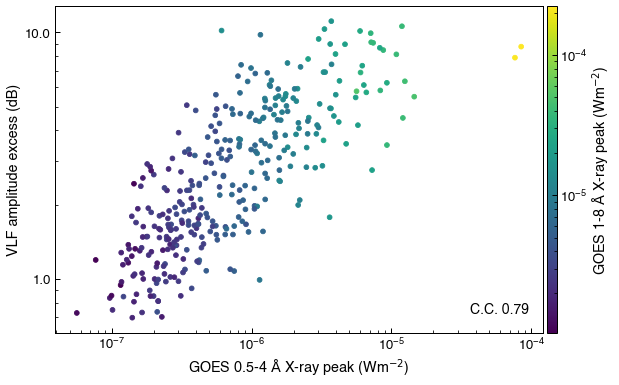

In [19]:
fig, ax = plt.subplots(figsize=(9, 6))
im = ax.scatter(vlf_stats["peak_flare_gs-bg"], vlf_stats["abs_vlf_db"], 
                c=vlf_stats["peak_flare_gl"], norm=colors.LogNorm(), 
                cmap=cmap_paper)
ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel("GOES 0.5-4 $\mathrm{\AA}$ X-ray peak (Wm$^{-2}$)")
ax.set_ylabel("VLF amplitude excess (dB)")

ax.yaxis.set_major_formatter(ScalarFormatter())

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label("GOES 1-8 $\mathrm{\AA}$ X-ray peak (Wm$^{-2}$)")

cc = scipy.stats.spearmanr(vlf_stats["peak_flare_gs-bg"], vlf_stats["abs_vlf_db"])
print(cc)
ax.text(0.85, 0.06, "C.C. {:.2f}".format(round(cc.correlation, 2)), transform=ax.transAxes, fontsize=14)

plt.savefig("./final_paper_plots/peak_flux_gs.png", facecolor="w", dpi=300, bbox_inches="tight")

### Background plots

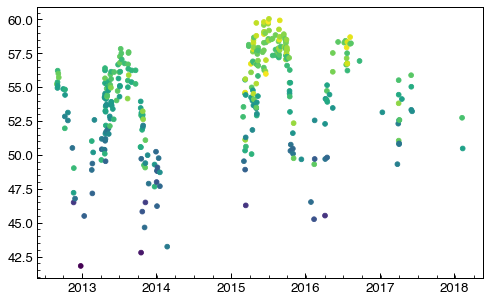

In [20]:

fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(pd.to_datetime(vlf_stats["start_time_goes"]), vlf_stats["background_sid_db"], 
            c=vlf_stats["max_vlf_db"])

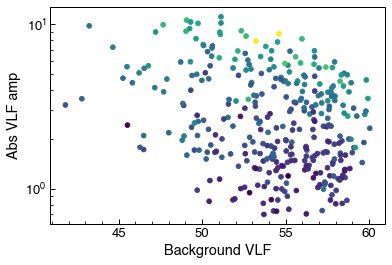

In [21]:
fig, ax = plt.subplots()
plt.scatter(vlf_stats["background_sid_db"], vlf_stats["abs_vlf_db"], 
            c=vlf_stats["peak_flare_gl"], norm=colors.LogNorm())
plt.xlabel("Background VLF")
plt.ylabel("Abs VLF amp")
plt.yscale("log")

## 4.2 Time Delay Analysis

In [22]:
vlf_stats[vlf_stats["start_time_goes"].isin(["2013-04-23 15:15:00"])][["dt_value_gl", "dt_value_gs"]]

,dt_value_gl,dt_value_gs
38,124.935,124.935


In [23]:
events_not_to_incl = ["2013-04-07 16:49:00", 
                      "2013-04-24 09:57:00", 
                      "2013-04-24 13:10:00",
                      "2013-05-04 16:07:00",
                      "2013-05-04 19:31:00", 
                      "2013-05-10 09:44:00",
                      "2013-05-10 12:37:00",
                      "2013-05-10 16:30:00",
                      "2013-05-23 15:25:00",
                      "2013-05-23 18:20:00",
                      "2013-06-28 16:50:00",
                      "2013-10-18 10:17:00",
                      "2015-04-18 18:09:00",
                      "2015-05-07 19:47:00",
                      "2015-08-23 18:56:00", #maybe fully remove
                      "2015-08-23 11:15:00", #maybe fully remove
                      "2015-09-27 12:47:00",
                      "2015-10-15 10:42:00",
                      "2015-10-31 15:48:00",
                      "2016-02-15 14:40:00",
                      "2016-02-15 17:14:00",
                      "2016-04-08 16:31:00",
                      "2016-04-16 14:30:00", 
                      "2016-06-09 12:28:00", 
                      "2016-07-23 17:38:00",
                      "2016-08-11 16:32:00",
                      "2017-06-03 09:37:00",
                      ]


double_peak = ["2013-04-25 10:43:00", 
               "2015-03-14 11:44:00", 
               "2015-05-07 09:54:00", 
               "2015-05-13 09:40:00", 
               "2015-05-13 18:09:00", 
               "2017-04-18 09:29:00", 
               "2013-05-17 08:43:00", 
               "2015-03-11 11:21:00", 
               "2016-07-19 10:00:00"]

remove_events = events_not_to_incl + double_peak
print(np.sum(vlf_stats["start_time_goes"].isin(events_not_to_incl)) == len(events_not_to_incl))
print(np.sum(vlf_stats["start_time_goes"].isin(double_peak)) == len(double_peak))

True
True


In [24]:
vlf_stats_dt = vlf_stats.drop(np.where(vlf_stats["start_time_goes"].isin(remove_events))[0])
vlf_double_peak = vlf_stats[vlf_stats["start_time_goes"].isin(double_peak)]

In [25]:
print("Spearman corr")
print("1-8 angs and VLF amp time delay (no remove):", scipy.stats.spearmanr(vlf_stats["peak_flare_gl"], vlf_stats["dt_value_gl"]).correlation)
print("1-8 angs and VLF amp time delay:", scipy.stats.spearmanr(vlf_stats_dt["peak_flare_gl"], vlf_stats_dt["dt_value_gl"]).correlation)
print("0.5-4 angs and VLF amp time delay (no remove):", scipy.stats.spearmanr(vlf_stats["peak_flare_gs"], vlf_stats["dt_value_gs"]).correlation)
print("0.5-4 angs and VLF amp time delay:", scipy.stats.spearmanr(vlf_stats_dt["peak_flare_gs"], vlf_stats_dt["dt_value_gs"]).correlation)

Spearman corr
1-8 angs and VLF amp time delay (no remove): -0.18620053461550667
1-8 angs and VLF amp time delay: -0.20873386494576573
0.5-4 angs and VLF amp time delay (no remove): -0.32425448787337646
0.5-4 angs and VLF amp time delay: -0.31974314221546773


In [26]:
print("Spearman corr")
print("1-8 angs and VLF amp time delay (no remove):", scipy.stats.spearmanr(vlf_stats["peak_flare_gl-bg"], vlf_stats["dt_value_gl"]).correlation)
print("1-8 angs and VLF amp time delay:", scipy.stats.spearmanr(vlf_stats_dt["peak_flare_gl-bg"], vlf_stats_dt["dt_value_gl"]).correlation)
print("0.5-4 angs and VLF amp time delay (no remove):", scipy.stats.spearmanr(vlf_stats["peak_flare_gs-bg"], vlf_stats["dt_value_gs"]).correlation)
print("0.5-4 angs and VLF amp time delay:", scipy.stats.spearmanr(vlf_stats_dt["peak_flare_gs-bg"], vlf_stats_dt["dt_value_gs"]).correlation)

Spearman corr
1-8 angs and VLF amp time delay (no remove): -0.19607162376684692
1-8 angs and VLF amp time delay: -0.21178774156862137
0.5-4 angs and VLF amp time delay (no remove): -0.32428720395930444
0.5-4 angs and VLF amp time delay: -0.3174624012098455


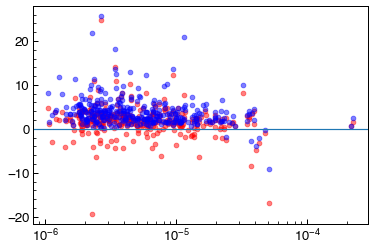

In [27]:
fig, ax = plt.subplots()
ax.scatter(vlf_stats["peak_flare_gl"], vlf_stats["dt_value_gl"]/60, alpha=0.5, color="r")
ax.scatter(vlf_stats["peak_flare_gl"], vlf_stats["dt_value_gs"]/60, alpha=0.5, color="b")
ax.axhline(0)
ax.set_xscale("log")
# ax.set_ylim(-10, 20)

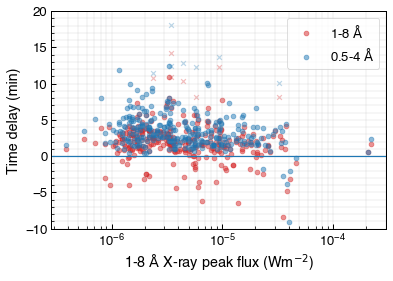

In [28]:
fig, ax = plt.subplots()
ax.scatter(vlf_stats_dt["peak_flare_gl-bg"], vlf_stats_dt["dt_value_gl"]/60, alpha=0.5, 
           color="tab:red", label="1-8 $\mathrm{\AA}$")
ax.scatter(vlf_stats_dt["peak_flare_gl-bg"], vlf_stats_dt["dt_value_gs"]/60, alpha=0.5, 
           color="tab:blue", label="0.5-4 $\mathrm{\AA}$")

ax.scatter(vlf_double_peak["peak_flare_gl"], vlf_double_peak["dt_value_gl"]/60, alpha=0.3, color="tab:red", marker='x')
ax.scatter(vlf_double_peak["peak_flare_gl"], vlf_double_peak["dt_value_gs"]/60, alpha=0.3, color="tab:blue", marker='x')

ax.axhline(0)
ax.set_xscale("log")
plt.grid(zorder=0, which="both", lw=0.2)
ax.set_ylim(-10, 20)
ax.set_ylabel("Time delay (min)")
ax.set_xlabel("1-8 $\mathrm{\AA}$ X-ray peak flux (Wm$^{-2}$)")
ax.legend()

In [29]:
vlf_stats_dt[vlf_stats_dt["dt_value_gs"]<0][["start_time_goes", "dt_value_gs"]]

,start_time_goes,dt_value_gs
73,2013-05-22 13:08:00,-545.279
156,2015-03-12 13:50:00,-123.845
176,2015-04-21 15:24:00,-229.389
256,2015-10-01 13:03:00,-18.395
279,2015-11-04 13:31:00,-163.159
320,2017-04-02 12:52:00,-106.479


In [30]:
vlf_stats_dt.keys()

Index(['start_time_goes', 'peak_flare_gl', 'peak_flare_gs', 'peak_flare_gl-bg',
       'peak_flare_gs-bg', 'max_vlf_volts', 'abs_vlf_volts',
       'background_sid_db', 'background_sid_volts', 'background_gl',
       'background_gs', 'max_vlf_db', 'abs_vlf_db', 'dt_value_gl',
       'dt_value_gs', 'index', 'event_starttime', 'event_peaktime',
       'event_endtime', 'goes_class_ind', 'goes_class', 'goes_class_val',
       'integrated_flux', 'noaa_ar', 'position_hgs', 'hgs_lat', 'hgs_lon',
       'hpc_x', 'hpc_y', 'event_end', 'peak_hour', 'unique_day',
       'background_times'],
      dtype='object')

In [31]:
vlf_stats_dt[vlf_stats_dt["dt_value_gs"]>10*60]

,start_time_goes,peak_flare_gl,peak_flare_gs,peak_flare_gl-bg,peak_flare_gs-bg,max_vlf_volts,abs_vlf_volts,background_sid_db,background_sid_volts,background_gl,...,noaa_ar,position_hgs,hgs_lat,hgs_lon,hpc_x,hpc_y,event_end,peak_hour,unique_day,background_times
83,2013-06-19 09:33:00,0.000008,1.317800e-06,0.000007,1.256017e-06,-0.372185,2.109215,54.023091,-2.481400,1.201300e-06,...,,S13E89,-13.0,-89.0,-919.742815,-212.726566,2013-06-19 10:25:00,9,2013-06-19,2013-06-19 09:33:00
179,2015-04-23 09:18:00,0.000011,1.460400e-06,0.000010,1.345120e-06,0.148737,2.604705,54.110339,-2.455968,1.311500e-06,...,12322,N07W80,7.0,80.0,933.269176,130.104958,2015-04-23 11:10:00,10,2015-04-23,2015-04-23 09:18:00
328,2017-04-18 09:29:00,0.000003,4.395900e-07,0.000003,4.290720e-07,-1.858612,0.592282,54.126761,-2.450895,1.100100e-07,...,12651,N09E84,9.0,-84.0,-938.701044,158.020719,2017-04-18 09:55:00,9,2017-04-18,2017-04-18 09:29:00
332,2017-06-07 10:03:00,0.000001,1.542800e-07,0.000001,1.471057e-07,-2.325042,0.378557,53.220327,-2.703599,9.689600e-08,...,,N20W89,20.0,89.0,888.091881,323.256763,2017-06-07 10:50:00,10,2017-06-07,2017-06-07 10:03:00


In [32]:
vlf_stats[vlf_stats["dt_value_gs"]<0][["start_time_goes", "dt_value_gs", "goes_class", "abs_vlf_db", "background_sid_db"]]

,start_time_goes,dt_value_gs,goes_class,abs_vlf_db,background_sid_db
73,2013-05-22 13:08:00,-545.279,M5.0,5.768352,54.959696
156,2015-03-12 13:50:00,-123.845,M4.2,6.332129,55.600475
176,2015-04-21 15:24:00,-229.389,M4.0,4.497034,58.265118
256,2015-10-01 13:03:00,-18.395,M4.5,5.484507,57.411053
279,2015-11-04 13:31:00,-163.159,M3.7,9.115215,52.345412
320,2017-04-02 12:52:00,-106.479,M2.3,7.323951,53.812062


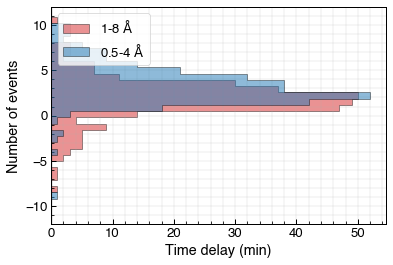

In [33]:
fig, ax = plt.subplots()
_, bins, _ = hist(vlf_stats_dt["dt_value_gl"]/60, bins=40, 
                  alpha=0.5, color="tab:red", 
                  label="1-8 $\mathrm{\AA}$", edgecolor="k", histtype="stepfilled", zorder=1, orientation="horizontal")

_ = hist(vlf_stats_dt["dt_value_gs"]/60, bins=bins, 
         alpha=0.5, color="tab:blue", 
         label="0.5-4 $\mathrm{\AA}$", edgecolor="k", histtype="stepfilled", zorder=2, orientation="horizontal")

plt.axvline(0, color="k", zorder=0)
ax.tick_params(axis="y", direction="in")
ax.set_ylabel("Number of events")
ax.set_xlabel("Time delay (min)")
plt.ylim(-12, 12)
plt.grid(zorder=0, which="both", lw=0.2)
ax.legend(loc="upper left")

## Statistics values

In [34]:
print(scipy.stats.spearmanr(vlf_stats_dt["peak_flare_gl"], vlf_stats_dt["dt_value_gl"]))
print(scipy.stats.spearmanr(vlf_stats_dt["peak_flare_gs"], vlf_stats_dt["dt_value_gs"]))

SpearmanrResult(correlation=-0.20873386494576573, pvalue=0.0002853963717746433)
SpearmanrResult(correlation=-0.31974314221546773, pvalue=1.6488403807836658e-08)


In [35]:
print(np.mean(vlf_stats_dt["dt_value_gl"])/60, np.median(vlf_stats_dt["dt_value_gl"])/60)
print(np.mean(vlf_stats_dt["dt_value_gs"])/60, np.median(vlf_stats_dt["dt_value_gs"])/60)

1.746696419183445 1.9346333333333334
3.4358145964765106 3.0199666666666665


In [36]:
print(np.mean(vlf_stats_dt[vlf_stats_dt["dt_value_gl"]>0]["dt_value_gl"])/60)
print(np.mean(vlf_stats_dt[vlf_stats_dt["dt_value_gs"]>0]["dt_value_gs"])/60)

2.4563231504539558
3.574138754851598


In [37]:
import statistics
print(statistics.mode(vlf_stats_dt["dt_value_gl"])/60)
print(statistics.mode(vlf_stats_dt["dt_value_gs"])/60)

0.6701333333333334
2.5341333333333336


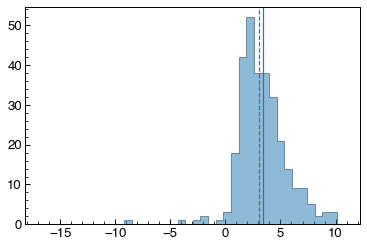

In [38]:
# _, bins, _ = hist(vlf_stats_dt["dt_value_gl"]/60, bins=40, 
#                   alpha=0.5, color="tab:red", 
#                   label="1-8 $\mathrm{\AA}$", edgecolor="k", histtype="stepfilled", zorder=1)

_ = hist(vlf_stats_dt["dt_value_gs"]/60, bins=bins, 
         alpha=0.5, color="tab:blue", 
         label="0.5-4 $\mathrm{\AA}$", edgecolor="k", histtype="stepfilled", zorder=2)

# plt.axvline(np.mean(vlf_stats_dt["dt_value_gl"])/60, color="tab:red")
# plt.axvline(np.median(vlf_stats_dt["dt_value_gl"])/60, color="tab:red")
plt.axvline(np.mean(vlf_stats_dt["dt_value_gs"])/60, color="tab:blue")
plt.axvline(np.median(vlf_stats_dt["dt_value_gs"])/60, color="tab:blue", ls="dashed")

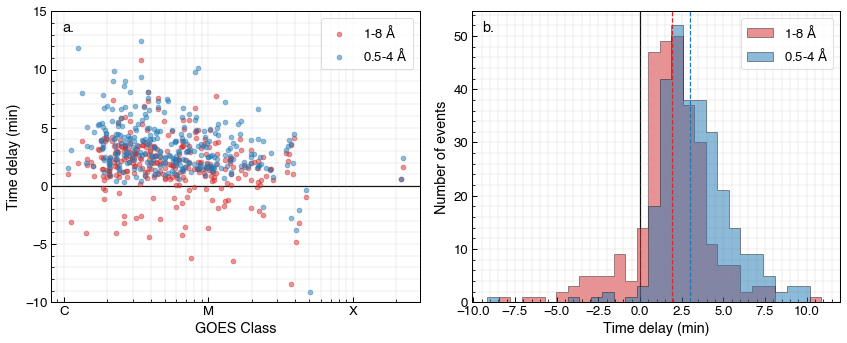

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))


ax1.scatter(vlf_stats_dt["peak_flare_gl"], vlf_stats_dt["dt_value_gl"]/60, alpha=0.5, 
           color="tab:red", label="1-8 $\mathrm{\AA}$")
ax1.scatter(vlf_stats_dt["peak_flare_gl"], vlf_stats_dt["dt_value_gs"]/60, alpha=0.5, 
           color="tab:blue", label="0.5-4 $\mathrm{\AA}$")

# ax1.scatter(vlf_double_peak["peak_flare_gl"], vlf_double_peak["dt_value_gl"]/60, alpha=0.3, color="tab:red", marker='x')
# ax1.scatter(vlf_double_peak["peak_flare_gl"], vlf_double_peak["dt_value_gs"]/60, alpha=0.3, color="tab:blue", marker='x')

ax1.axhline(0, color="k", zorder=0)
ax1.set_xscale("log")
ax1.grid(zorder=0, which="both", lw=0.2)
ax1.set_ylim(-10, 15)
ax1.set_ylabel("Time delay (min)")
ax1.set_xlabel("GOES Class")
ax1.set_xticks([1e-6, 1e-5, 1e-4])
ax1.set_xticklabels(["C", "M", "X"])



ax1.legend()


_, bins, _ = hist(vlf_stats_dt["dt_value_gl"]/60, bins=40, 
                  alpha=0.5, color="tab:red", 
                  label="1-8 $\mathrm{\AA}$", edgecolor="k", 
                  histtype="stepfilled", zorder=1, ax=ax2)

_ = hist(vlf_stats_dt["dt_value_gs"]/60, bins=bins, 
         alpha=0.5, color="tab:blue", 
         label="0.5-4 $\mathrm{\AA}$", edgecolor="k", 
         histtype="stepfilled", zorder=2, ax=ax2)

plt.axvline(0, color="k", zorder=0)
ax2.tick_params(axis="y", direction="in")
ax2.set_ylabel("Number of events")
ax2.set_xlabel("Time delay (min)")
ax2.set_xlim(-10.1, 12)
ax2.grid(zorder=0, which="both", lw=0.2)
ax2.legend(loc="upper right")

ax2.axvline(np.median(vlf_stats_dt["dt_value_gl"])/60, ls="dashed", color="tab:red")
ax2.axvline(np.median(vlf_stats_dt["dt_value_gs"])/60, ls="dashed", color="tab:blue")

ax1.text(0.03, 0.93, "a.", transform=ax1.transAxes)
ax2.text(0.03, 0.93, "b.", transform=ax2.transAxes)



plt.tight_layout()
# plt.subplots_adjust(wspace=0.03)
plt.savefig("./final_paper_plots/time_delay_plots.png", facecolor="w", dpi=500, bbox_inches="tight")

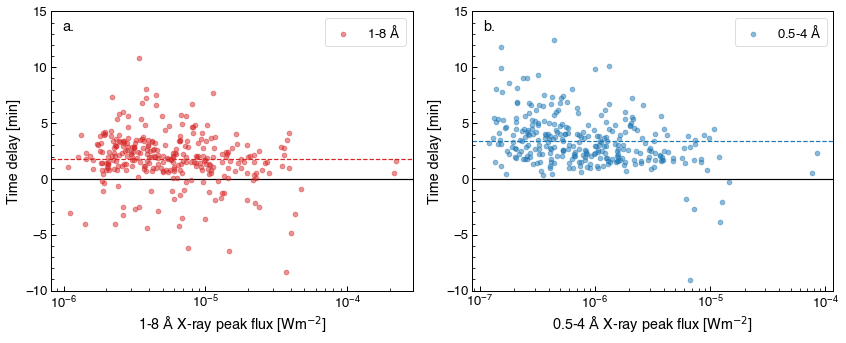

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))


ax1.scatter(vlf_stats_dt["peak_flare_gl"], vlf_stats_dt["dt_value_gl"]/60, alpha=0.5, 
           color="tab:red", label="1-8 $\mathrm{\AA}$")


# ax1.scatter(vlf_double_peak["peak_flare_gl"], vlf_double_peak["dt_value_gl"]/60, alpha=0.3, color="tab:red", marker='x')

ax1.axhline(0, color="k", zorder=0)
ax1.set_xscale("log")
# ax1.grid(zorder=0, which="both", lw=0.2)
ax1.set_ylim(-10, 15)
ax1.set_ylabel("Time delay [min]")
ax1.set_xlabel("1-8 $\mathrm{\AA}$ X-ray peak flux [Wm$^{-2}$]")
ax1.legend()


ax2.scatter(vlf_stats_dt["peak_flare_gs"], vlf_stats_dt["dt_value_gs"]/60, alpha=0.5, 
           color="tab:blue", label="0.5-4 $\mathrm{\AA}$")
# ax2.scatter(vlf_double_peak["peak_flare_gs"], vlf_double_peak["dt_value_gs"]/60, alpha=0.3, color="tab:blue", marker='x')


ax2.axhline(0, color="k", zorder=0)

ax2.set_xscale("log")
# ax2.grid(zorder=0, which="both", lw=0.2)
ax2.set_ylim(-10, 15)
ax2.set_ylabel("Time delay [min]")
ax2.set_xlabel("0.5-4 $\mathrm{\AA}$ X-ray peak flux [Wm$^{-2}$]")
ax2.legend()


ax1.text(0.03, 0.93, "a.", transform=ax1.transAxes)
ax2.text(0.03, 0.93, "b.", transform=ax2.transAxes)

ax1.axhline(np.mean(vlf_stats_dt["dt_value_gl"])/60, ls="dashed", color="tab:red")
ax2.axhline(np.mean(vlf_stats_dt["dt_value_gs"])/60, ls="dashed", color="tab:blue")

plt.tight_layout()
# plt.subplots_adjust(wspace=0.03)
plt.savefig("./final_paper_plots/time_delay_plots_sep.png", facecolor="w", dpi=500, bbox_inches="tight")

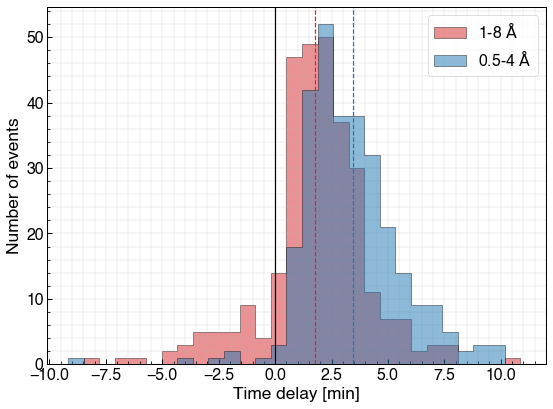

In [43]:
sns.set_context("paper", font_scale=1.8)
fig, ax = plt.subplots(figsize=(8, 6))

_, bins, _ = hist(vlf_stats_dt["dt_value_gl"]/60, bins=40, 
                  alpha=0.5, color="tab:red", 
                  label="1-8 $\mathrm{\AA}$", edgecolor="k", 
                  histtype="stepfilled", zorder=1, ax=ax)

_ = hist(vlf_stats_dt["dt_value_gs"]/60, bins=bins, 
         alpha=0.5, color="tab:blue", 
         label="0.5-4 $\mathrm{\AA}$", edgecolor="k", 
         histtype="stepfilled", zorder=2, ax=ax)

ax.tick_params(axis="y", direction="in")
ax.set_ylabel("Number of events")
ax.set_xlabel("Time delay [min]")
ax.set_xlim(-10.1, 12)
ax.grid(zorder=0, which="both", lw=0.2)
ax.legend(loc="upper right")



ax.axvline(np.mean(vlf_stats_dt["dt_value_gl"])/60, ls="dashed", color="tab:red")
ax.axvline(np.mean(vlf_stats_dt["dt_value_gs"])/60, ls="dashed", color="tab:blue")



ax.axvline(0, color="k")
plt.tight_layout()
plt.savefig("./final_paper_plots/time_delay_dist.png", facecolor="w", dpi=500, bbox_inches="tight")
sns.set_context("paper", font_scale=1.5)

In [48]:
import statistics
print(statistics.mode(vlf_stats_dt["dt_value_gl"])/60)
print(statistics.mean(vlf_stats_dt["dt_value_gl"])/60)
print(statistics.median(vlf_stats_dt["dt_value_gl"])/60)


0.6701333333333334
1.746696419183445
1.9346333333333334


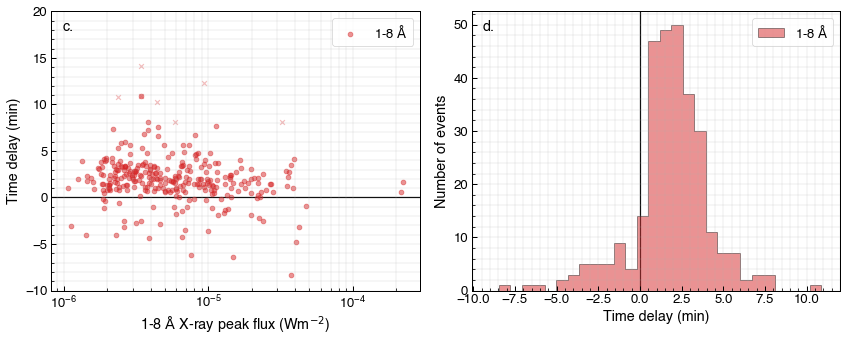

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))


ax1.scatter(vlf_stats_dt["peak_flare_gl"], vlf_stats_dt["dt_value_gl"]/60, alpha=0.5, 
           color="tab:red", label="1-8 $\mathrm{\AA}$")
# ax1.scatter(vlf_stats_dt["peak_flare_gl"], vlf_stats_dt["dt_value_gs"]/60, alpha=0.5, 
#            color="tab:blue", label="0.5-4 $\mathrm{\AA}$")

ax1.scatter(vlf_double_peak["peak_flare_gl"], vlf_double_peak["dt_value_gl"]/60, alpha=0.3, color="tab:red", marker='x')
# ax1.scatter(vlf_double_peak["peak_flare_gl"], vlf_double_peak["dt_value_gs"]/60, alpha=0.3, color="tab:blue", marker='x')

ax1.axhline(0, color="k", zorder=0)
ax1.set_xscale("log")
ax1.grid(zorder=0, which="both", lw=0.2)
ax1.set_ylim(-10, 20)
ax1.set_ylabel("Time delay (min)")
ax1.set_xlabel("1-8 $\mathrm{\AA}$ X-ray peak flux (Wm$^{-2}$)")
ax1.legend()


_, bins, _ = hist(vlf_stats_dt["dt_value_gl"]/60, bins=40, 
                  alpha=0.5, color="tab:red", 
                  label="1-8 $\mathrm{\AA}$", edgecolor="k", 
                  histtype="stepfilled", zorder=1, ax=ax2)

# _ = hist(vlf_stats_dt["dt_value_gs"]/60, bins=bins, 
#          alpha=0.5, color="tab:blue", 
#          label="0.5-4 $\mathrm{\AA}$", edgecolor="k", 
#          histtype="stepfilled", zorder=2, ax=ax2)

plt.axvline(0, color="k", zorder=0)
ax2.tick_params(axis="y", direction="in")
ax2.set_ylabel("Number of events")
ax2.set_xlabel("Time delay (min)")
ax2.set_xlim(-10.1, 12)
ax2.grid(zorder=0, which="both", lw=0.2)
ax2.legend(loc="upper right")


ax1.text(0.03, 0.93, "c.", transform=ax1.transAxes)
ax2.text(0.03, 0.93, "d.", transform=ax2.transAxes)



plt.tight_layout()
# plt.subplots_adjust(wspace=0.03)
plt.savefig("./final_paper_plots/time_delay_plots_onlygl.png", facecolor="w", dpi=500, bbox_inches="tight")

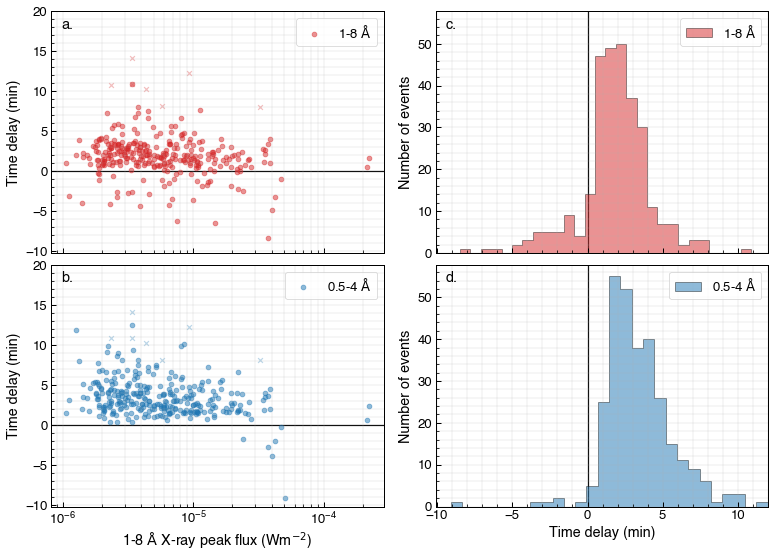

In [35]:
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(11,8), sharex='col', sharey='col')




ax1[0].scatter(vlf_stats_dt["peak_flare_gl"], vlf_stats_dt["dt_value_gl"]/60, alpha=0.5, 
           color="tab:red", label="1-8 $\mathrm{\AA}$")
ax1[0].scatter(vlf_double_peak["peak_flare_gl"], vlf_double_peak["dt_value_gl"]/60, alpha=0.3, color="tab:red", marker='x')

_, bins, _ = hist(vlf_stats_dt["dt_value_gl"]/60, bins=40, 
                  alpha=0.5, color="tab:red", 
                  label="1-8 $\mathrm{\AA}$", edgecolor="k", 
                  histtype="stepfilled", zorder=1, ax=ax1[1])



ax2[0].scatter(vlf_stats_dt["peak_flare_gl"], vlf_stats_dt["dt_value_gs"]/60, alpha=0.5, 
           color="tab:blue", label="0.5-4 $\mathrm{\AA}$")
ax2[0].scatter(vlf_double_peak["peak_flare_gl"], vlf_double_peak["dt_value_gl"]/60, alpha=0.3, color="tab:blue", marker='x')

_, bins, _ = hist(vlf_stats_dt["dt_value_gs"]/60, bins=40, 
                  alpha=0.5, color="tab:blue", 
                  label="0.5-4 $\mathrm{\AA}$", edgecolor="k", 
                  histtype="stepfilled", zorder=1, ax=ax2[1])


for a in ax1, ax2:
    a[0].axhline(0, color="k", zorder=0)
    a[0].set_xscale("log")
    a[0].grid(zorder=0, which="both", lw=0.2)
    a[0].set_ylim(-10.2, 20)
    a[0].set_ylabel("Time delay (min)")
    a[0].legend()

    a[1].axvline(0, color="k", zorder=0)
    a[1].tick_params(axis="y", direction="in")
    a[1].set_ylabel("Number of events")

    a[1].set_xlim(-10.1, 12)
    a[1].grid(zorder=0, which="both", lw=0.2)
    a[1].legend(loc="upper right")


ax2[1].set_xlabel("Time delay (min)") 
ax2[0].set_xlabel("1-8 $\mathrm{\AA}$ X-ray peak flux (Wm$^{-2}$)")

ax1[0].text(0.03, 0.93, "a.", transform=ax1[0].transAxes)
ax2[0].text(0.03, 0.93, "b.", transform=ax2[0].transAxes)
ax1[1].text(0.03, 0.93, "c.", transform=ax1[1].transAxes)
ax2[1].text(0.03, 0.93, "d.", transform=ax2[1].transAxes)



plt.tight_layout()
plt.subplots_adjust(hspace=0.05)
plt.savefig("./final_paper_plots/time_delay2.png", dpi=300, facecolor="w", bbox_inches="tight")

# Heliographic Analysis

In [45]:
ref_coord = SkyCoord(0*u.arcsec, 0*u.arcsec, obstime="2013-10-28", frame=frames.Helioprojective) 
map_meta = sunpy.map.make_fitswcs_header(np.zeros((2400, 2400)), ref_coord)
blank_map = sunpy.map.Map(np.zeros((2400, 2400)), map_meta)

/Users/laurahayes/opt/miniconda3/lib/python3.9/site-packages/sunpy/map/mapbase.py:957: SunpyMetadataWarning: Missing metadata for observer: assuming Earth-based observer.

  rsun = sun._angular_radius(self.rsun_meters, self.dsun)


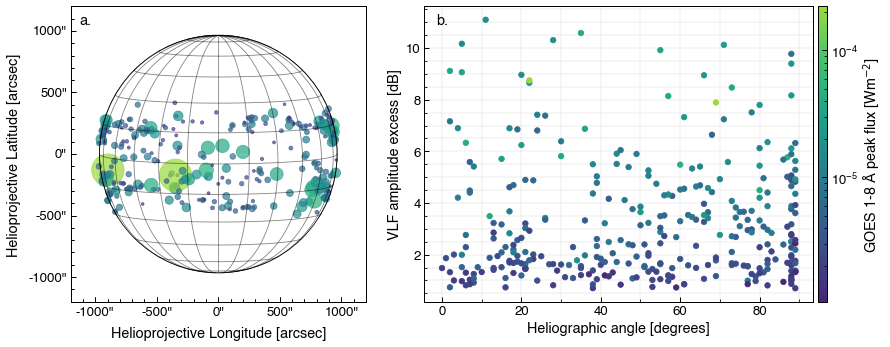

In [47]:
spec = gridspec.GridSpec(ncols=2, nrows=1,
                         width_ratios=[1.2,1.8])

# fig = plt.figure(figsize=(11, 4))
fig = plt.figure(figsize=(12, 5))
# plot map locations
ax1 = fig.add_subplot(spec[0], projection=blank_map)
blank_map.plot(alpha=0, title="", axes=ax1)
blank_map.draw_limb(color="k", axes=ax1)
_ = blank_map.draw_grid(color="k")

ax1.tick_params(which="both", direction="in",)
ax1.scatter((vlf_stats["hpc_x"].values*u.arcsec).to(u.deg), (vlf_stats["hpc_y"].values*u.arcsec).to(u.deg),
            transform=ax1.get_transform("world"), alpha=0.7, c=np.log10(vlf_stats["goes_class_val"]), 
            s=5e6*(vlf_stats["goes_class_val"]), cmap=new_cmap)
ax1.set_xlabel("Helioprojective Longitude [arcsec]")
ax1.set_ylabel("Helioprojective Latitude [arcsec]")

# plot correlation
vlf_stats2 = vlf_stats[~vlf_stats["hgs_lon"].isnull()]
ax2 = fig.add_subplot(spec[1])

sc = ax2.scatter(np.abs(vlf_stats["hgs_lon"]), vlf_stats["abs_vlf_db"], 
            c=vlf_stats["peak_flare_gl"], cmap=new_cmap, norm=colors.LogNorm(),
            zorder=3, s=30)



ax2.grid(lw=0.2,which="both")

ax2.set_ylabel("VLF amplitude excess [dB]")
ax2.set_xlabel("Heliographic angle [degrees]")
ax2.tick_params(which="both", direction="in")
ax2.xaxis.set_major_locator(MultipleLocator(20))
ax2.xaxis.set_minor_locator(MultipleLocator(10))



cc = scipy.stats.spearmanr(np.abs(vlf_stats2["hgs_lon"]), vlf_stats2["abs_vlf_db"])
# ax2.text(0.77, 0.92, "C.C. {:.2f}".format(round(cc.correlation, 2)), transform=ax2.transAxes)


cbar = fig.colorbar(sc, ax=ax2, pad=0.01, aspect=30)
cbar.set_label("GOES 1-8 $\mathrm{\AA}$ peak flux [Wm$^{-2}$]")

ax1.text(0.03, 0.94, "a.", transform=ax1.transAxes)
ax2.text(0.03, 0.94, "b.", transform=ax2.transAxes)

plt.tight_layout()
plt.savefig("./final_paper_plots/helio_position.png", dpi=300, facecolor="w", bbox_inches="tight")

In [38]:
overlay

NameError: name 'overlay' is not defined

In [ ]:
? plt.scatter